#### Importing important libraries:

In [1]:
import numpy as np
import pandas as pd
import nltk

import re
import string
A
nltk.download('inaugural')
from nltk.corpus import inaugural

from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91861\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [2]:
# inaugural.raw('1941-Roosevelt.txt')
# inaugural.raw('1961-Kennedy.txt')
# inaugural.raw('1973-Nixon.txt')

In [3]:
Roosevelt_text = inaugural.fileids()[38]

In [4]:
Kennedy_text = inaugural.fileids()[43]

In [5]:
Nixon_text = inaugural.fileids()[46]

#### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [6]:
Words_R = list(inaugural.words(Roosevelt_text))
Words_K = list(inaugural.words(Kennedy_text))
Words_N = list(inaugural.words(Nixon_text))

In [7]:
Char_count_R = list(inaugural.raw(Roosevelt_text))
Char_count_K = list(inaugural.raw(Kennedy_text))
Char_count_N = list(inaugural.raw(Nixon_text))

In [8]:
print( '\033[1m','Number of Characters.' '\033[0m')
print("---------------------")
print("Number of Characters in Roosevelt's Inaugural speech:",len(Char_count_R))
print("Number of Characters in Kennedy's Inaugural speech",len(Char_count_K))
print("Number of Characters in Nixon's Inaugural speech:",len(Char_count_N))

 Number of Characters.
---------------------
Number of Characters in Roosevelt's Inaugural speech: 7571
Number of Characters in Kennedy's Inaugural speech 7618
Number of Characters in Nixon's Inaugural speech: 9991


In [9]:
print( '\033[1m','Number of Words.' '\033[0m')
print("---------------------")
print("Number of Words in Roosevelt's Inaugural speech:",len(Words_R))
print("Number of Words in Kennedy's  Inaugural speech:",len(Words_K))
print("Number of Words in Nixon's Inaugural speech:",len(Words_N))

 Number of Words.
---------------------
Number of Words in Roosevelt's Inaugural speech: 1536
Number of Words in Kennedy's  Inaugural speech: 1546
Number of Words in Nixon's Inaugural speech: 2028


In [10]:
Sentence_R = list(inaugural.sents(Roosevelt_text))
Sentence_K = list(inaugural.sents(Kennedy_text))
Sentence_N = list(inaugural.sents(Nixon_text))

In [11]:
print( '\033[1m','Number of Sentences.' '\033[0m')
print("---------------------")
print("Number of Sentences in Roosevelt's Inaugural speech:",len(Sentence_R))
print("Number of Sentences in Kennedy's  Inaugural speech:",len(Sentence_K))
print("Number of Sentences in Nixon's Inaugural speech:",len(Sentence_N))

 Number of Sentences.
---------------------
Number of Sentences in Roosevelt's Inaugural speech: 68
Number of Sentences in Kennedy's  Inaugural speech: 52
Number of Sentences in Nixon's Inaugural speech: 69


#### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

1. Stopwords removed.
2. Numbers removed.
3. Special characters removed.

In [12]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation) + list()

In [13]:
Clean_Words_R = (w.lower() for w in inaugural.words(Roosevelt_text))
Clean_Words_K = (w.lower() for w in inaugural.words(Kennedy_text))
Clean_Words_N = (w.lower() for w in inaugural.words(Nixon_text))

In [14]:
Clean_Words_R = [word for word in Clean_Words_R if word not in stopwords]
Clean_Words_K = [word for word in Clean_Words_K if word not in stopwords]
Clean_Words_N  = [word for word in Clean_Words_N if word not in stopwords]

In [15]:
# joining all the words after removing the stopwords

Cleaned_Text_R = ' '.join(Clean_Words_R)
Cleaned_Text_K = ' '.join(Clean_Words_K)
Cleaned_Text_N = ' '.join(Clean_Words_N)

In [16]:
Cleaned_Text_R = re.sub(r'\d+', '', Cleaned_Text_R)
Cleaned_Text_K = re.sub(r'\d+', '', Cleaned_Text_K)
Cleaned_Text_N = re.sub(r'\d+', '', Cleaned_Text_N)

In [17]:
Cleaned_Text_R = re.sub('[^A-Z a-z]+',' ', Cleaned_Text_R)
Cleaned_Text_K = re.sub('[^A-Z a-z]+',' ', Cleaned_Text_K)
Cleaned_Text_N = re.sub('[^A-Z a-z]+',' ', Cleaned_Text_N)

In [18]:
print( '\033[1m','Word count after removing Stopwords, Punctuations, Special characters and numbers.' '\033[0m')
print("-------`a-------------------------------------------------------------------------------------")
print("Number of Characters in Roosevelt's Inaugural speech after cleaning:",len(''.join(Cleaned_Text_R)))
print("Number of Characters in Kennedy's Inaugural speech after cleaning:",len(''.join(Cleaned_Text_K)))
print("Number of Characters in Nixon's Inaugural speech after cleaning:",len(''.join(Cleaned_Text_N)))
print("")
print("Number of Words in Roosevelt's Inaugural speech after cleaning:",len(Cleaned_Text_R.split()))
print("Number of Words in Kennedy's Inaugural speech after cleaning:",len(Cleaned_Text_K.split()))
print("Number of Words in Nixon's Inaugural speech after cleaning:",len(Cleaned_Text_N.split()))

 Word count after removing Stopwords, Punctuations, Special characters and numbers.
-------`a-------------------------------------------------------------------------------------
Number of Characters in Roosevelt's Inaugural speech after cleaning: 4621
Number of Characters in Kennedy's Inaugural speech after cleaning: 4816
Number of Characters in Nixon's Inaugural speech after cleaning: 5957

Number of Words in Roosevelt's Inaugural speech after cleaning: 627
Number of Words in Kennedy's Inaugural speech after cleaning: 692
Number of Words in Nixon's Inaugural speech after cleaning: 834


In [19]:
print( '\033[1m','Sample sentence after cleaning the text' '\033[0m')
print("------------------------------------------")
print("Sample Sentence from Roosevelt's speech:"'\n',Cleaned_Text_R[98:196])
print("")
print("Sample Sentence from Kennedy's speech:"'\n',Cleaned_Text_K[102:203])
print("")
print("Sample Sentence from Nixon's speech:"'\n',Cleaned_Text_N[100:201])

 Sample sentence after cleaning the text
------------------------------------------
Sample Sentence from Roosevelt's speech:
  people create weld together nation lincoln day task people preserve nation disruption within day 

Sample Sentence from Kennedy's speech:
  truman reverend clergy fellow citizens observe today victory party celebration freedom   symbolizing

Sample Sentence from Nixon's speech:
  country share together met four years ago america bleak spirit depressed prospect seemingly endless 


#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

#### Lemmatization:

#### Getting the frequency distribution of words in all the speeches:

In [55]:
lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
# from nltk.corpus import wordnet
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

pos_tagged = nltk.pos_tag(nltk.word_tokenize(Cleaned_Text_R))  
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
Clean_Text_R = " ".join(lemmatized_sentence)

In [56]:
pos_tagged = nltk.pos_tag(nltk.word_tokenize(Cleaned_Text_K))  
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
Clean_Text_K = " ".join(lemmatized_sentence)

In [57]:
pos_tagged = nltk.pos_tag(nltk.word_tokenize(Cleaned_Text_N))  
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
Clean_Text_N = " ".join(lemmatized_sentence)

#### Removing some useless words manually:

In [131]:
stopwords.extend(['u','know','must','within','still','like','came','shall','ask','can','let','make','come','every','mr','us','may'])

In [132]:
Clean_Text_R =  ' '.join(x for x in Clean_Text_R.split() if x not in stopwords)
Clean_Text_K =  ' '.join(x for x in Clean_Text_K.split() if x not in stopwords)
Clean_Text_N =  ' '.join(x for x in Clean_Text_N.split() if x not in stopwords)

In [133]:
print( '\033[1m','Characters and Word count after Lemmatization and additional stopwords.' '\033[0m')
print("---------------------------------------------------")
print("Number of Characters in Roosevelt's Inaugural speech after Lemmatization:",len(''.join(Clean_Text_R)))
print("Number of Characters in Kennedy's Inaugural speech after Lemmatization:",len(''.join(Clean_Text_K)))
print("Number of Characters in Nixon's Inaugural speech after Lemmatization:",len(''.join(Clean_Text_N)))
print("")
print("Number of Words in Roosevelt's Inaugural speech after Lemmatization:",len(Clean_Text_R.split()))
print("Number of Words in Kennedy's Inaugural speech after Lemmatization:",len(Clean_Text_K.split()))
print("Number of Words in Nixon's Inaugural speech after Lemmatization:",len(Clean_Text_N.split()))

 Characters and Word count after Lemmatization and additional stopwords.
---------------------------------------------------
Number of Characters in Roosevelt's Inaugural speech after Lemmatization: 4159
Number of Characters in Kennedy's Inaugural speech after Lemmatization: 4315
Number of Characters in Nixon's Inaugural speech after Lemmatization: 5304

Number of Words in Roosevelt's Inaugural speech after Lemmatization: 581
Number of Words in Kennedy's Inaugural speech after Lemmatization: 634
Number of Words in Nixon's Inaugural speech after Lemmatization: 741


In [134]:
# Frequency distribution for words in '1941-Roosevelt.txt'
FreqDist(nltk.word_tokenize(Clean_Text_R)).most_common()

[('nation', 15),
 ('life', 10),
 ('people', 9),
 ('spirit', 9),
 ('democracy', 9),
 ('year', 7),
 ('america', 7),
 ('live', 6),
 ('freedom', 6),
 ('human', 5),
 ('measure', 5),
 ('men', 5),
 ('new', 5),
 ('body', 5),
 ('mind', 5),
 ('day', 4),
 ('state', 4),
 ('government', 4),
 ('something', 4),
 ('faith', 4),
 ('speak', 4),
 ('task', 3),
 ('history', 3),
 ('three', 3),
 ('future', 3),
 ('american', 3),
 ('seem', 3),
 ('great', 3),
 ('thing', 3),
 ('build', 3),
 ('free', 3),
 ('alone', 3),
 ('continent', 3),
 ('person', 3),
 ('world', 3),
 ('sacred', 3),
 ('find', 3),
 ('word', 3),
 ('land', 3),
 ('first', 3),
 ('destiny', 3),
 ('national', 2),
 ('sense', 2),
 ('washington', 2),
 ('create', 2),
 ('together', 2),
 ('disruption', 2),
 ('without', 2),
 ('time', 2),
 ('midst', 2),
 ('take', 2),
 ('stock', 2),
 ('peril', 2),
 ('little', 2),
 ('doubt', 2),
 ('believe', 2),
 ('form', 2),
 ('true', 2),
 ('republic', 2),
 ('late', 2),
 ('security', 2),
 ('hope', 2),
 ('ideal', 2),
 ('present',

In [135]:
# Frequency distribution for words in '1961-Kennedy.txt'

FreqDist(nltk.word_tokenize(Clean_Text_K)).most_common()

[('world', 8),
 ('side', 8),
 ('power', 7),
 ('new', 7),
 ('nation', 7),
 ('pledge', 7),
 ('citizen', 5),
 ('free', 5),
 ('president', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('begin', 4),
 ('man', 4),
 ('hand', 4),
 ('first', 4),
 ('generation', 4),
 ('american', 4),
 ('war', 4),
 ('peace', 4),
 ('always', 4),
 ('support', 4),
 ('hope', 4),
 ('help', 4),
 ('arm', 4),
 ('country', 4),
 ('call', 4),
 ('today', 3),
 ('well', 3),
 ('god', 3),
 ('form', 3),
 ('human', 3),
 ('poverty', 3),
 ('life', 3),
 ('globe', 3),
 ('right', 3),
 ('state', 3),
 ('dare', 3),
 ('word', 3),
 ('go', 3),
 ('friend', 3),
 ('bear', 3),
 ('burden', 3),
 ('control', 3),
 ('struggle', 3),
 ('good', 3),
 ('join', 3),
 ('unite', 3),
 ('never', 3),
 ('final', 3),
 ('vice', 2),
 ('end', 2),
 ('forebear', 2),
 ('century', 2),
 ('yet', 2),
 ('belief', 2),
 ('around', 2),
 ('revolution', 2),
 ('forth', 2),
 ('time', 2),
 ('place', 2),
 ('foe', 2),
 ('pass', 2),
 ('undo', 2),
 ('commit', 2),
 ('whether', 2),
 ('meet', 2),


In [136]:
# Frequency distribution for words in '1973-Nixon.txt'

FreqDist(nltk.word_tokenize(Clean_Text_N)).most_common()

[('america', 21),
 ('peace', 19),
 ('world', 18),
 ('responsibility', 16),
 ('new', 15),
 ('nation', 14),
 ('great', 10),
 ('government', 10),
 ('year', 9),
 ('home', 9),
 ('abroad', 8),
 ('together', 7),
 ('time', 7),
 ('policy', 7),
 ('role', 7),
 ('right', 7),
 ('history', 7),
 ('respect', 6),
 ('people', 6),
 ('well', 6),
 ('help', 6),
 ('four', 5),
 ('war', 5),
 ('today', 5),
 ('era', 5),
 ('long', 5),
 ('progress', 5),
 ('others', 5),
 ('live', 5),
 ('act', 5),
 ('challenge', 5),
 ('one', 5),
 ('share', 4),
 ('meet', 4),
 ('promise', 4),
 ('work', 4),
 ('freedom', 4),
 ('build', 4),
 ('place', 4),
 ('system', 4),
 ('god', 4),
 ('way', 4),
 ('turn', 4),
 ('old', 4),
 ('individual', 4),
 ('proud', 4),
 ('faith', 4),
 ('country', 3),
 ('stand', 3),
 ('resolve', 3),
 ('retreat', 3),
 ('lead', 3),
 ('greatly', 3),
 ('century', 3),
 ('reach', 3),
 ('continue', 3),
 ('bold', 3),
 ('end', 3),
 ('generation', 3),
 ('understand', 3),
 ('preserve', 3),
 ('another', 3),
 ('future', 3),
 ('fo

In [64]:
Most_comm_R = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_R)).most_common()[:10],columns=[['Word','Frequency']])
Most_comm_K = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_K)).most_common()[:10],columns=[['Word','Frequency']])
Most_comm_N = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_N)).most_common()[:10],columns=[['Word','Frequency']])

In [137]:
print('\033[1m',"The top three words in '1941-Roosevelt.txt' inaugural speech:",'\033[0m',)
Most_comm_R.T

 The top three words in '1941-Roosevelt.txt' inaugural speech: 


,0,1,2,3,4,5,6,7,8,9
Word,nation,life,people,spirit,democracy,year,america,live,freedom,human
Frequency,15,10,9,9,9,7,7,6,6,5


In [138]:
print('\033[1m',"The top three words in '1961-Kennedy.txt' inaugural speech:",'\033[0m',)
Most_comm_K.T

 The top three words in '1961-Kennedy.txt' inaugural speech: 


,0,1,2,3,4,5,6,7,8,9
Word,world,side,power,new,nation,pledge,citizen,free,president,fellow
Frequency,8,8,7,7,7,7,5,5,4,4


In [139]:
print('\033[1m',"The top three words in  '1973-Nixon.txt' inaugural speech:",'\033[0m',)
Most_comm_N.T

 The top three words in  '1973-Nixon.txt' inaugural speech: 


,0,1,2,3,4,5,6,7,8,9
Word,america,peace,world,responsibility,new,nation,great,government,year,home
Frequency,21,19,18,16,15,14,10,10,9,9


#### Finding out the rare words in the text:

In [68]:
Most_rare_R = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_R)).most_common()[-10:],columns=[['Word','Frequency']])
Most_rare_K = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_K)).most_common()[-10:],columns=[['Word','Frequency']])
Most_rare_N = pd.DataFrame(FreqDist(nltk.word_tokenize(Clean_Text_N)).most_common()[-10:],columns=[['Word','Frequency']])

In [69]:
print('\033[1m',"Rare words in '1941-Roosevelt.txt' inaugural speech:"'\033[0m')
Most_rare_R.T

 Rare words in '1941-Roosevelt.txt' inaugural speech:


,0,1,2,3,4,5,6,7,8,9
Word,perpetuate,integrity,muster,retreat,content,stand,americans,service,country,god
Frequency,1,1,1,1,1,1,1,1,1,1


In [70]:
print('\033[1m',"Rare words in '1961-Kennedy.txt' inaugural speech:"'\033[0m')

Most_rare_K.T

 Rare words in '1961-Kennedy.txt' inaugural speech:


,0,1,2,3,4,5,6,7,8,9
Word,sacrifice,conscience,sure,reward,judge,lead,land,love,bless,work
Frequency,1,1,1,1,1,1,1,1,1,1


In [71]:
print('\033[1m',"Rare words in '1973-Nixon.txt' inaugural speech:"'\033[0m')

Most_rare_N.T

 Rare words in '1973-Nixon.txt' inaugural speech:


,0,1,2,3,4,5,6,7,8,9
Word,young,begin,bright,beacon,go,sustain,strive,always,serve,purpose
Frequency,1,1,1,1,1,1,1,1,1,1


#### Frequency distribution plots for all three inaugural speeches:

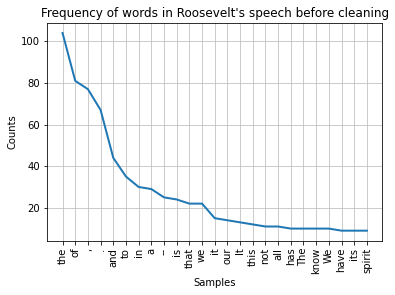

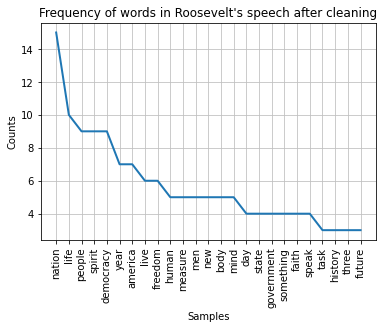

In [79]:
plt.title("Frequency of words in Roosevelt's speech before cleaning")
fdist = FreqDist([seg for seg in (Words_R)])
fdist.plot(25)

plt.title("Frequency of words in Roosevelt's speech after cleaning")
fdist = FreqDist([seg for seg in nltk.word_tokenize(Clean_Text_R)])
fdist.plot(25);

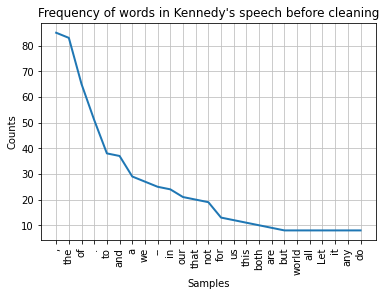

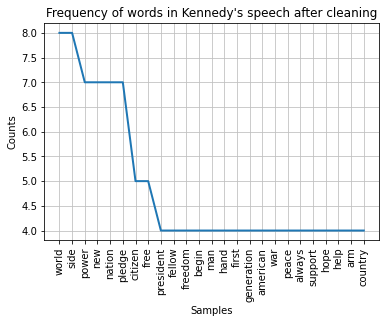

In [80]:
plt.title("Frequency of words in Kennedy's speech before cleaning")
fdist = FreqDist([seg for seg in (Words_K)])
fdist.plot(25)

plt.title("Frequency of words in Kennedy's speech after cleaning")
fdist = FreqDist([seg for seg in nltk.word_tokenize(Clean_Text_K)])
fdist.plot(25);

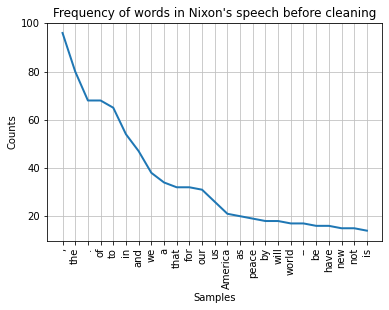

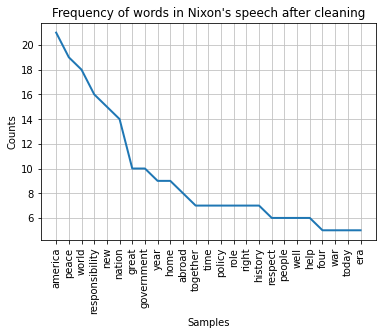

In [81]:
plt.title("Frequency of words in Nixon's speech before cleaning")
fdist = FreqDist([seg for seg in (Words_N)])
fdist.plot(25)

plt.title("Frequency of words in Nixon's speech after cleaning")
fdist = FreqDist([seg for seg in nltk.word_tokenize(Clean_Text_N)])
fdist.plot(25);


#### Lexical dispersion plot:
Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus. Lexical dispersion illustrates the homogeneity of a word (or set of words) across the documents of a corpus

#### Lexical dispersion plot for most common words used in Roosevelt's speech:

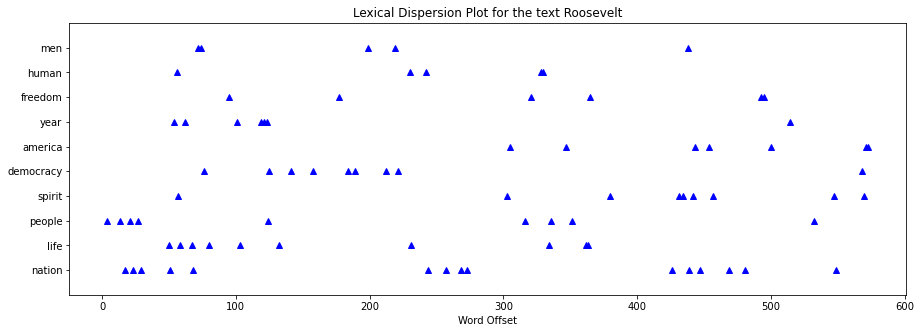

In [82]:
# Words from Most common words in Roosevelt speech:

words = ['nation','life','people','spirit','democracy','america','year','freedom','human','men']
wt_words = nltk.word_tokenize(Clean_Text_R)
 
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
 
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.figure(figsize=(15,5))
plt.plot(x, y, "b^", scalex=.1)
plt.yticks(range(len(words)), words, color="black")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot for the text Roosevelt")
plt.xlabel("Word Offset")
plt.show()

#### Lexical dispersion plot for most common words used in Kennedy's speech:

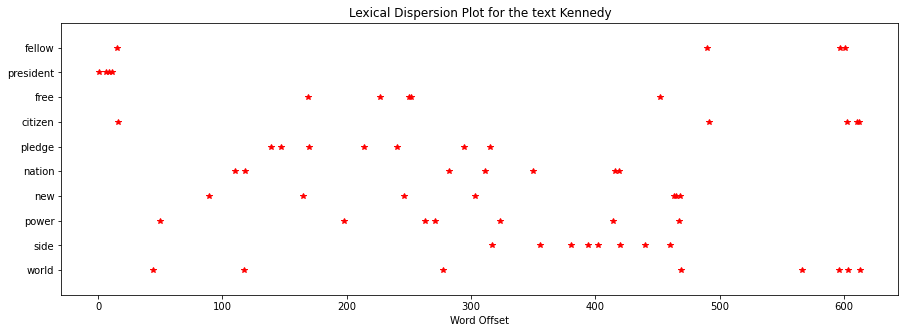

In [83]:
# Words from Most common words in Kennedy speech:

words = ['world','side','power','new','nation','pledge','citizen','free','president','fellow']
wt_words = nltk.word_tokenize(Clean_Text_K)
 
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
 
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.figure(figsize=(15,5))
plt.plot(x, y, "r*", scalex=.1)
plt.yticks(range(len(words)), words, color="black")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot for the text Kennedy")
plt.xlabel("Word Offset")
plt.show()

#### Lexical dispersion plot for most common words used in Nixon's speech:

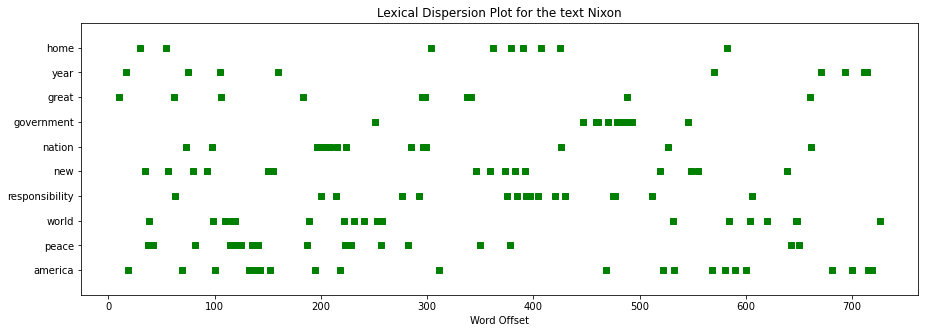

In [84]:
# Words from Most common words in Nixon speech:

words = ['america','peace','world','responsibility','new','nation','government','great','year','home']
wt_words = nltk.word_tokenize(Clean_Text_N)
 
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
 
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.figure(figsize=(15,5))
plt.plot(x, y, "gs", scalex=.1)
plt.yticks(range(len(words)), words, color="black")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot for the text Nixon")
plt.xlabel("Word Offset")
plt.show()

#### Creating a corpus for all three speeches:

In [140]:
Corpus_R = ''.join(Clean_Text_R)
Corpus_K = ''.join(Clean_Text_K)
Corpus_N = ''.join(Clean_Text_N)

#### Word Cloud for Roosevelt inaugural speech:

Word Cloud for Inaugural Speech by Roosevelt)!!


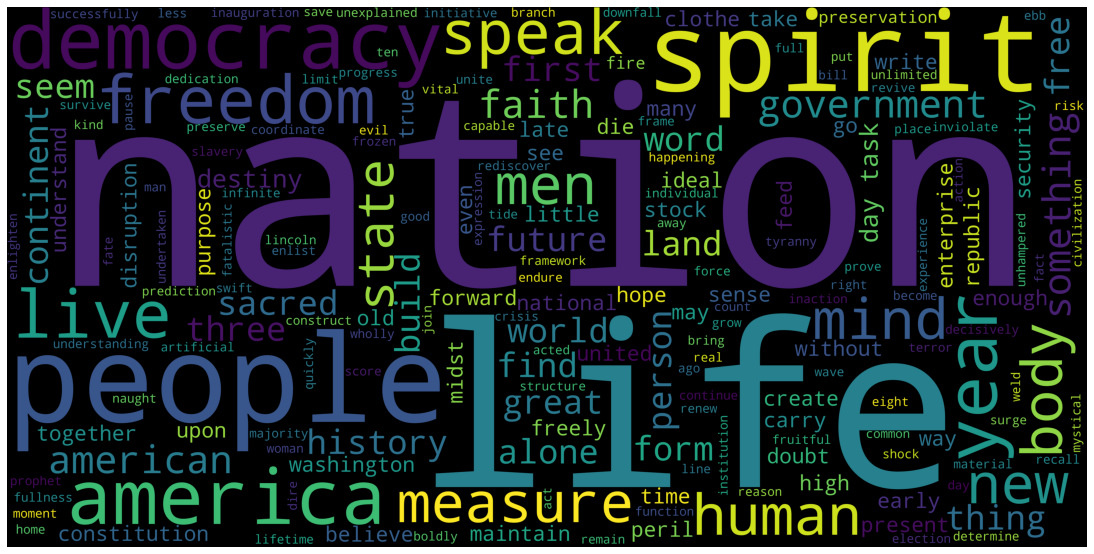

In [86]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 6000, height = 3000, 
                background_color ='black', 
                min_font_size =4, random_state=1,margin=5).generate(Corpus_R) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15,15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m'"Word Cloud for Inaugural Speech by Roosevelt)!!"'\033[0m')
plt.show()

#### Word Cloud for Kennedy inaugural speech:

Word Cloud for Inaugural Speech by Kennedy)!!


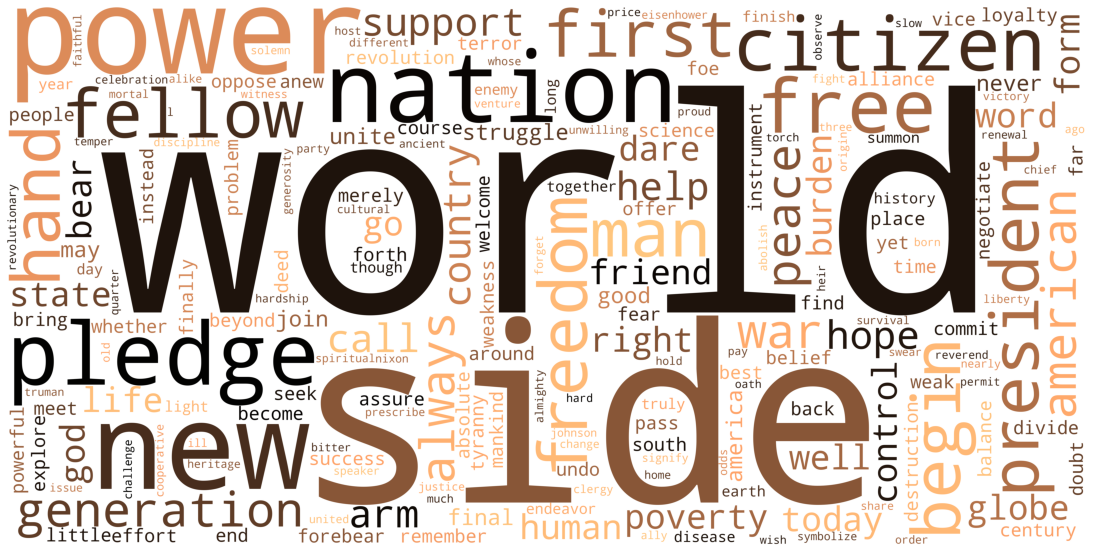

In [87]:
wordcloud = WordCloud(width = 6000, height = 3000,
                background_color ='white', 
                min_font_size =4, random_state=1,margin=5,
                     #contour_color='White',
                     colormap='copper',
                     mode='RGB').generate(Corpus_K) 
  
  
                       
plt.figure(figsize = (15,15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m'"Word Cloud for Inaugural Speech by Kennedy)!!"'\033[0m')
plt.show()

#### Word Cloud for Nixon inaugural speech:

Word Cloud for Inaugural Speech by Nixon)!!


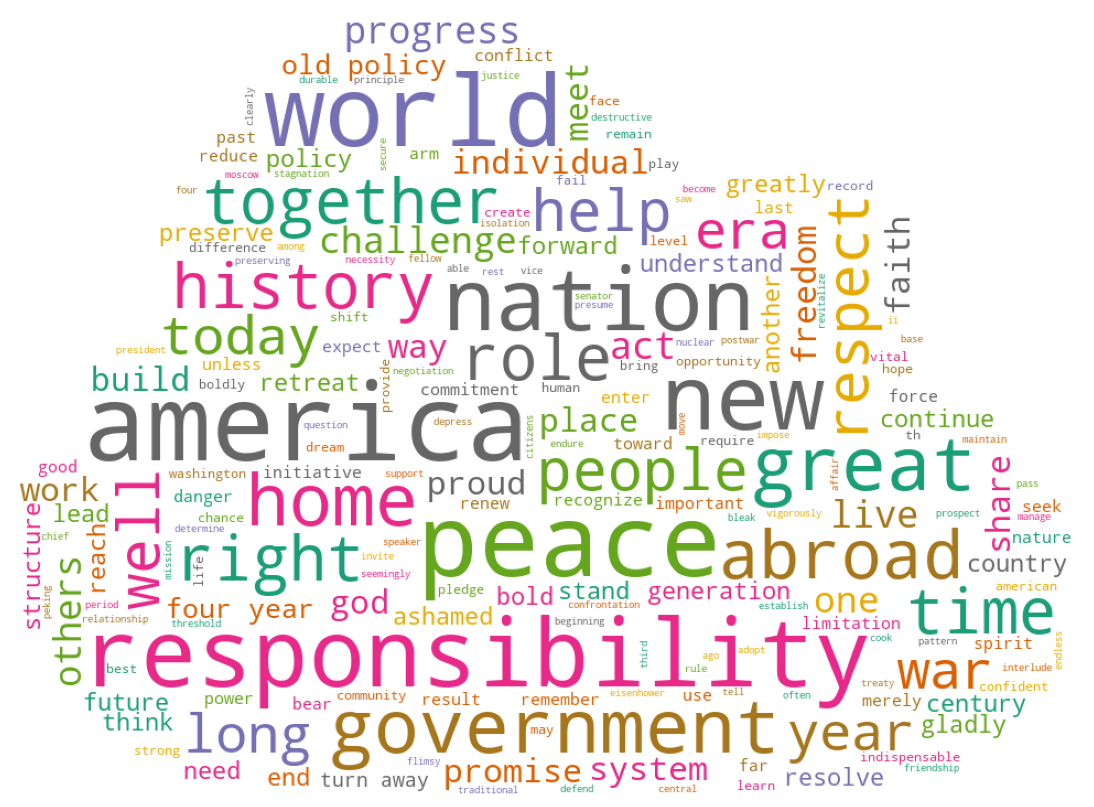

In [88]:
from PIL import Image
maskArray = np.array(Image.open("R.png"))
wordcloud = WordCloud(mask=maskArray,width = 500, height = 100, 
                background_color ='white', 
                min_font_size =4, random_state=1,margin=5,
                     contour_color='White',
                     colormap='Dark2_r',
                     mode='RGBA').generate(Corpus_N) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15,15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m'"Word Cloud for Inaugural Speech by Nixon)!!"'\033[0m')
plt.show()

In [89]:
Corpus_full_words = Clean_Text_R+Clean_Text_K+Clean_Text_N

In [90]:
len(Corpus_full_words.split())

1961

Word Cloud for Inaugural Speech by Kennedy)!!


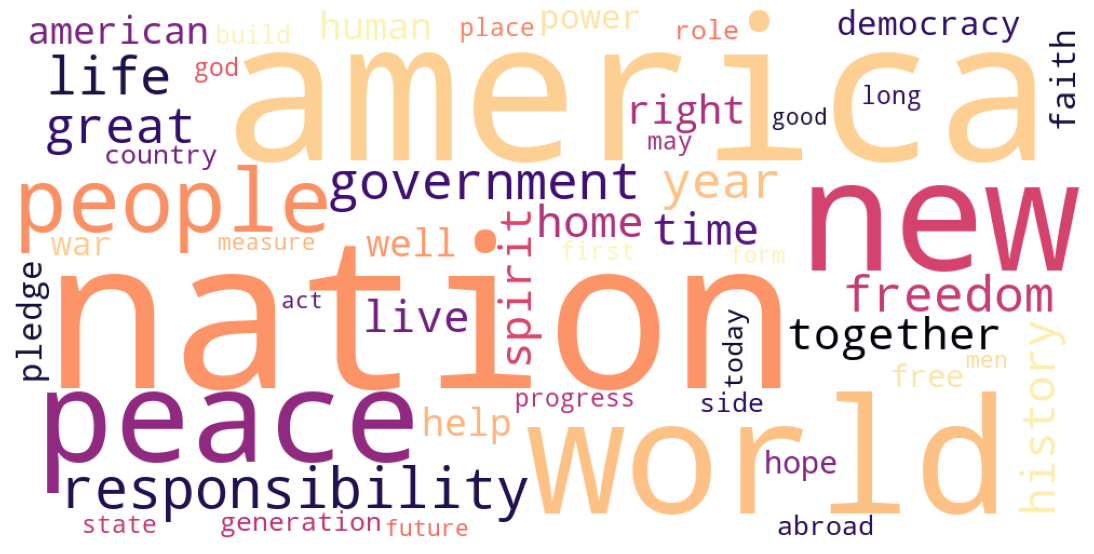

In [141]:
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white', 
                min_font_size =4, random_state=5,margin=5,max_words=50,
                     #contour_color='White',
                     colormap='magma',
                     mode='RGB').generate(Corpus_full_words) 
  
  
                       
plt.figure(figsize = (15,15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m'"Word Cloud for Inaugural Speech by Kennedy)!!"'\033[0m')
plt.show()
plt.show()

### END